# Predicting CO2 emission using multilinear regression

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('data/population_data.csv')

In [38]:
data

,Year,C02_Emission_Kt,Population_Total
0,1960,120581.961,4.505477e+08
1,1961,130402.187,4.596422e+08
2,1962,143467.708,4.690772e+08
3,1963,154083.673,4.788256e+08
4,1964,150647.694,4.888481e+08
...,...,...,...
56,2016,2183280.000,1.324517e+09
57,2017,2301440.000,1.338677e+09
58,2018,2434520.000,1.352642e+09
59,2019,NaN,1.366418e+09


In [39]:
data.isnull().sum()

Year                0
C02_Emission_Kt     2
Population_Total    0
dtype: int64

we saw that, there are missing values in C02_Emission_Kt

### Handling Missing values

In [40]:
mean=data['C02_Emission_Kt'].mean()
mean

774283.4385254236

we will fill all null values using mean.

In [43]:
data['C02_Emission_Kt'].fillna(value=mean,inplace=True)

In [44]:
data.isnull().sum()

Year                0
C02_Emission_Kt     0
Population_Total    0
dtype: int64

Now, We can see there are no Null Values as such.

### Let's Normalize the data.

We need to normalize the data, there are some features whose values are much much bigger than other features. If we do not normalize the data, feature with bigger data will dominate the prediction.

better to scale all the data in range of -1 to 1.

In [46]:
#we need to normalize the data using mean normalization so as to attain values between -1 to 1.
data=(data-data.mean())/data.std();
data.head()

,Year,C02_Emission_Kt,Population_Total
0,-1.689862,-1.006869,-1.495666
1,-1.633533,-0.991743,-1.464627
2,-1.577204,-0.971619,-1.432425
3,-1.520875,-0.955267,-1.399154
4,-1.464547,-0.960560,-1.364947


we can see, our data is normalized now. Now data is ready for furthur processing.

### Its time to create metrics and set hyperparameters

#### lets start with creating train and test set from dataframe

In [47]:
#here we want to splitting the data into 80-20% 
msk = np.random.rand(len(data)) < 0.8

In [48]:
train =data[msk]

In [119]:
test = data[~msk]

In [120]:
print(len(data),len(train),len(test))

61 44 17


so we saw, that our data is divided into train and test data.

#### Its time to create X and Y array for train and test data.

In [123]:
x_train = train.loc[:,['Year','Population_Total']]
y_train = train.loc[:,['C02_Emission_Kt']]
ones = np.ones([x_train.shape[0],1])
x_train = np.concatenate((ones,x_train),axis=1)

We added ones in starting of every row, 
to calculate hypothesis function-
h(x) = theta0*x0 + theta1*x1 +theta2*x2
or
h(x) = Transpose(theta)*x_train
<b>here x0=1</b>

so we get final equation-<br>
<b>h(x) = theta0 + theta1*x1 +theta2*x2<b>

for furthur clarification you could refer to Andrew Neg multi-linear regression videos.

In [65]:
x_train

array([[ 1.        , -1.68986152, -1.49566603],
       [ 1.        , -1.6335328 , -1.46462658],
       [ 1.        , -1.57720408, -1.43242489],
       [ 1.        , -1.52087536, -1.39915361],
       [ 1.        , -1.46454665, -1.36494674],
       [ 1.        , -1.2955605 , -1.25725844],
       [ 1.        , -1.18290306, -1.1798389 ],
       [ 1.        , -0.95758819, -1.00343552],
       [ 1.        , -0.90125947, -0.95554281],
       [ 1.        , -0.84493076, -0.90673594],
       [ 1.        , -0.78860204, -0.85715474],
       [ 1.        , -0.73227332, -0.80671517],
       [ 1.        , -0.67594461, -0.7552095 ],
       [ 1.        , -0.61961589, -0.70232333],
       [ 1.        , -0.50695845, -0.59177763],
       [ 1.        , -0.45062974, -0.5342533 ],
       [ 1.        , -0.3379723 , -0.41618446],
       [ 1.        , -0.28164359, -0.35636626],
       [ 1.        , -0.22531487, -0.29624554],
       [ 1.        , -0.16898615, -0.23581217],
       [ 1.        , -0.11265743, -0.175

In [138]:
theta=np.zeros((x_train.shape[1],1)) #we created the theta array
y_train.head()

,C02_Emission_Kt
0,-1.006869
1,-0.991743
2,-0.971619
3,-0.955267
4,-0.960560


similarly lets saggregate the test dataframe.

In [152]:
x_test = test.loc[:,['Year','Population_Total']]
ones = np.ones([x_test.shape[0],1])
x_test = np.concatenate((ones,x_test),axis=1)
y_test = test.loc[:,['C02_Emission_Kt']]

In [153]:
x_test.shape

(17, 3)

In [154]:
y_test.tail()

,C02_Emission_Kt
46,0.677662
49,1.223344
55,2.119296
59,0.000000
60,0.000000


so we are done with the train and test data splitting. and we could see data is splitted randomly.

In [390]:
#setting hyper parameters
alpha = 0.0007
iter=1000

### Lets write the function for computing cost

In [391]:
# Compting cost function

def computeCost(x_train,y_train,theta):
    toSum = np.power((np.dot(x_train,theta)-y_train),2)
    return np.sum(toSum)/(2*len(y_train))

### MOST important part

#### implementation of Gradient descent algo

When u call gradient descent function it will return you the optimum theta array and cost listarray.

In [392]:
def gradientDescent(x_train,y_train,theta,iter,alpha):
    cost=np.zeros(iter)
    for i in range(iter):
        y_pred=np.dot(x_train,theta)
        d_theta = (1/len(y_train))*np.dot(x_train.T,y_pred-y_train)
        theta = theta -alpha*d_theta
        cost[i]=computeCost(x_train,y_train,theta)
        # u could also check cost at every step by calling
        #print(computeCost(x_train,y_train,theta))
    return theta,cost

#### calling gradient descent

In [393]:
final_theta,cost_list = gradientDescent(x_train,y_train,theta,iter,alpha)
print(final_theta)

[[0.03135282]
 [0.35931417]
 [0.36884252]]


So, we got values optimum of theta in the form of array. we could use this to predict the co2 emmision on the basis of input parameters i.e population and year.

In [394]:
finalCost =computeCost(x_train,y_train,final_theta)
finalCost

C02_Emission_Kt    0.108898
dtype: float64

### Lets see, how our cost plot looks like

Text(0, 0.5, 'Cost')

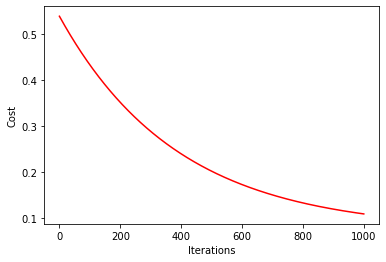

In [395]:
fig,ax = plt.subplots()
ax.plot(np.arange(iter),cost_list,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

In the above figure, u could see that value of cost is decresing with increasing iterations and thats all we want.

Choosing alpha and iteration is going to dtermine how your model is going to perform.

alpha can neither be too low nor too high.
you could see the difference by choosing different alpha values.

### Okay, Most awaited section

#### Calcutaion of mean error

In [396]:
# calculating the predicted y values 
y_pred = np.dot(x_test,final_theta)
y_pred

array([[-0.96515525],
       [-0.93168724],
       [-0.86366109],
       [-0.79337701],
       [-0.75717723],
       [-0.72029639],
       [-0.41000275],
       [-0.28574138],
       [-0.03098292],
       [ 0.09767969],
       [ 0.1838491 ],
       [ 0.57487778],
       [ 0.70352881],
       [ 0.83001056],
       [ 1.0678002 ],
       [ 1.2195891 ],
       [ 1.25693244]])

In [397]:
error = (1/x_test.shape[0])*np.sum(np.abs(y_test-y_pred))

print("Test error is :", error*100)
print("Test Accuracy is :", (1- error)*100)

Test error is : C02_Emission_Kt    35.909394
dtype: float64
Test Accuracy is : C02_Emission_Kt    64.090606
dtype: float64


Text(0.5, 1.0, 'Actual vs predicted')

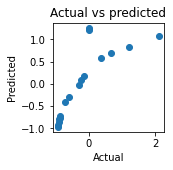

In [404]:
plt.figure(figsize=(2,2))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted')

### Well 35% error is huge, lets see it using sklearn

In [398]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data.head()

,Year,C02_Emission_Kt,Population_Total
0,-1.689862,-1.006869,-1.495666
1,-1.633533,-0.991743,-1.464627
2,-1.577204,-0.971619,-1.432425
3,-1.520875,-0.955267,-1.399154
4,-1.464547,-0.960560,-1.364947


In [399]:
x = data.loc[:,['Year','Population_Total']]
y = data.loc[:,['C02_Emission_Kt']]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [400]:
model = LinearRegression()
model.fit(X_train,Y_train)
preds = model.predict(X_test)
error = mean_squared_error(Y_test, preds)

In [401]:
print("error using the sklearn library:",error*100,"%")

error using the sklearn library: 25.448344204881796 %


#### So, we got 25% error while using sklearn too, that means data itself is not sufficient enough to land up to some conclusion.
Indication - Lack of data

### Learnings -

1. Fundamentals behind Multilinear regression.
2. How to manage and play with data and dataframe.
3. Implemetation of multinear regression with and without Sklearn.

# Thank you